In [2]:
#Importations

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import time as tm

<h2> Problem 1 <h2>

In [3]:
#Part A

titanic_df = pd.read_csv('titanic.csv')

print("Number of rows:", len(titanic_df))

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [ ]:
#Part B

def make_age_group(age):

    #Grouping into 8 categories
    
    if age >= 0 and age <= 10:
    
        return '1-10'
    
    elif age > 10 and age <= 20:
        
        return '11-20'
    
    elif age > 20 and age <= 30:
        
        return '21-30'
    
    elif age > 30 and age <= 40:
        
        return '31-40'
    
    elif age > 40 and age <= 50:
        
        return '41-50'
    
    elif age > 50 and age <= 60:
        
        return '51-60'
    
    elif age > 60 and age <= 70:
        
        return '61-70'
    
    elif age > 70 and age <= 80:
        
        return '71-80'
    
    else:
        
        return None

titanic_df['age_group'] = titanic_df['age'].apply(make_age_group)

titanic_df['is_child'] = (titanic_df['age'] < 16).astype(int)

In [ ]:
#Part C

number_of_females_survived = ((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1)).sum()

number_of_females = titanic_df['sex'].value_counts()['female']

Percentage_of_surviving_females = round((number_of_females_survived/number_of_females) * 100, 2)

print("Percentage of surviving females:", Percentage_of_surviving_females, "%" )

number_of_male_children_survived = ((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1) & (titanic_df['is_child'] == 1)).sum()

number_of_male_children = ((titanic_df['sex'] == 'male') & (titanic_df['is_child'] == 1)).sum()

Percentage_of_surviving_male_children = round((number_of_male_children_survived/number_of_male_children)*100, 2)

print("Percentage of surviving male children:", Percentage_of_surviving_male_children, "%" )

number_of_1st_class_male_adults_survived = ((titanic_df['pclass'] == 1) & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1) & (titanic_df['is_child'] == 0)).sum()

number_of_1st_class_male_adults = ((titanic_df['pclass'] == 1) & (titanic_df['sex'] == 'male') & (titanic_df['is_child'] == 0)).sum()

Percentage_of_surviving_1st_class_male_adult = round((number_of_1st_class_male_adults_survived/number_of_1st_class_male_adults)*100, 2)

print("Percentage of surviving 1st class male adult: ", Percentage_of_surviving_1st_class_male_adult, "%")

In [ ]:
#Part D

df_lim = titanic_df[['pclass', 'sex', 'is_child', 'survived']]

In [4]:
#Part E

np.random.seed(200)

test = np.random.choice(range(1309), size=131, replace=False)

In [5]:
#Part F

#New df to contain subset rows from df_lim based on index position in test

df_test = pd.DataFrame(df_lim.values[test], columns=df_lim.columns)

#New df to contain all rows from df_lim based except index position in test 

df_train = pd.DataFrame(df_lim.drop(test).values, columns=df_lim.columns)

NameError: name 'df_lim' is not defined

In [7]:
#Part G

def survival_prediction(row, df_train):
    
    #Find the rows that match the columns 
    
    match = df_train[(df_train['pclass'] == row['pclass']) & (df_train['sex'] == row['sex']) & (df_train['is_child'] == row['is_child'])]
    
    if len(match) > 0:
        
        #Find number of passengers that survied and did not survive as fraction
        
        number_of_passengers_that_matched = match['survived'].value_counts(normalize=True)
        
        max_value = number_of_passengers_that_matched.max()
        
        #Find index where number of matched passengers is equal to max value to get prediction of survived or not survived
        
        prediction = number_of_passengers_that_matched[number_of_passengers_that_matched == max_value].index[0]
        
        return prediction
    
    else:
        
        #No matching rows then NAN
        
        return np.nan
    
df_test['survived_hat'] = df_test.apply(survival_prediction, args=(df_train,), axis=1)

NameError: name 'df_test' is not defined

In [60]:
#Part H

correct_predictions = sum(df_test['survived'] == df_test['survived_hat'])

accuracy = round((correct_predictions / 131) *100)

print("Accuracy: ", accuracy, "%")

Accuracy:  76 %


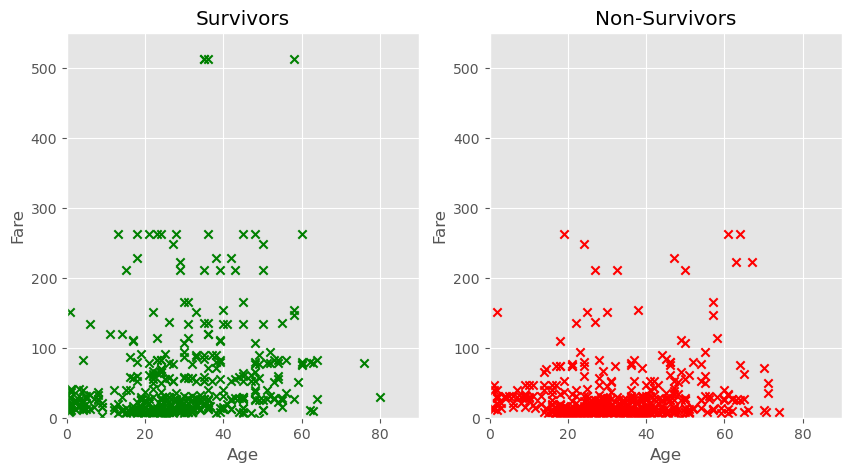

In [61]:
#Part I

plt.style.use('ggplot')

survived = titanic_df[titanic_df['survived'] == 1]

not_survived = titanic_df[titanic_df['survived'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(survived['age'], survived['fare'], marker='x', color='green')

ax1.set_xlabel('Age')

ax1.set_ylabel('Fare')

ax1.set_title('Survivors')

ax1.set_xlim([0, 90])

ax1.set_ylim([0, 550])

ax2.scatter(not_survived['age'], not_survived['fare'], marker='x', color='red')

ax2.set_xlabel('Age')

ax2.set_ylabel('Fare')

ax2.set_title('Non-Survivors')

ax2.set_xlim([0, 90])

ax2.set_ylim([0, 550])

plt.show()

In [1]:
titanic_df


NameError: name 'titanic_df' is not defined

I had a hypothesis that higher fare would lead to higher chances of survival. Here we can see that the survivors had more people that paid higher fares than the non-survivors. We are also able to interpret that the highest number of fatalities occured for ages 15-50.

<h2> Problem 2 <h2>

In [74]:
#Part A

fifa_df = pd.read_csv('FIFA_Worldcup_2022.csv')

In [75]:
#Part B

print(fifa_df.columns)

teams = fifa_df['Team'].unique()

print(teams)

Index(['Sl. No', 'Match No.', 'Team', 'Against', 'Group', 'Goal',
       'Possession (%)', 'Inside Penalty Area', 'Outside Penalty Area',
       'Assists', 'Total Attempts', 'On Target', 'Off Target',
       'Target in Penalty', 'Target from Outside', 'Left Channel',
       'Left Inside Channel', 'Central Channel', 'Right Inside Channel',
       'Right Channel', 'Receptions MD', 'Receptions D',
       'Attempted Line Breaks', 'Completed Line Breaks',
       'Attempted Defensive Line Breaks', 'Completed Defensive Line Breaks',
       'Yellow Cards', 'Red Cards', 'Fouls Against', 'Offsides', 'Passes',
       'Passes Completed', 'Crosses', 'Crosses Completed', 'Corners',
       'Free Kicks', 'Penalties Scored', 'Pts'],
      dtype='object')
['Qatar' 'Ecuador' 'England' 'Iran' 'Senegal' 'Netherlands'
 'United States' 'Wales' 'Argentina' 'Saudi Arabia' 'Denmark' 'Tunisia'
 'Mexico' 'Poland' 'France' 'Australia' 'Morocco' 'Croatia' 'Germany'
 'Japan' 'Spain' 'Costa Rica' 'Belgium' 'Canada' '

In [76]:
#Part C

df_G = fifa_df[:96]

In [77]:
#Part D

df_G_lim = fifa_df[['Match No.', 'Team', 'Against', 'Group', 'Goal', 'Pts']]

In [78]:
#Part E

df_G_lim_dict = df_G_lim.set_index('Team')['Group'].to_dict()

In [79]:
#Part F

def GetGroupTeams(team_name, df_G_lim):
    
    #Find the group that the input team belongs to 
    
    group = df_G_lim.loc[df_G_lim['Team'] == team_name, 'Group'].values[0]
    
    #Filter df to find only the teams in same group
    
    teams = df_G_lim.loc[df_G_lim['Group'] == group, 'Team'].values.tolist()
    
    return list(set(teams))

GetGroupTeams('England', df_G_lim)

['United States', 'Wales', 'England', 'Iran']

In [80]:
#Part G

def GetGroupRows(team_name, df_G):
    
    #Find the teams in the same group 
    
    teams = GetGroupTeams(team_name, df_G)
    
    #Find the matches that the teams played in 
    
    matches = df_G.loc[(df_G['Team'].isin(teams)) & (df_G['Against'].isin(teams))]
    
    return matches

GetGroupRows('England', df_G)

,Sl. No,Match No.,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,...,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
2,3,2,England,Iran,B,6,69,6,0,6,...,9,2,810,733,29,9,8,16,0,3
3,4,2,Iran,England,B,2,20,2,0,1,...,14,2,232,156,11,3,0,10,1,0
6,7,4,United States,Wales,B,1,51,1,0,1,...,15,1,569,509,31,4,5,11,0,1
7,8,4,Wales,United States,B,1,39,1,0,0,...,10,1,409,321,15,6,3,15,1,1
32,33,17,Wales,Iran,B,0,51,0,0,0,...,9,2,508,413,20,5,2,12,0,1
33,34,17,Iran,Wales,B,2,33,1,1,1,...,10,2,295,202,26,4,7,11,0,3
38,39,20,England,United States,B,0,51,0,0,0,...,9,1,550,488,13,4,3,15,0,1
39,40,20,United States,England,B,0,40,0,0,0,...,15,0,427,368,16,2,7,10,0,1
68,69,35,Wales,England,B,0,33,0,0,0,...,16,1,325,261,4,1,1,10,0,0
69,70,35,England,Wales,B,3,58,2,1,2,...,9,1,588,529,17,7,6,17,0,3


In [81]:
#Part H    
    
def GetTeamStats(team_name, df_G):
    
    #New df where the team is playing
    
    team_df = df_G[(df_G['Team'] == team_name) | (df_G['Against'] == team_name)]
    
    #Find each individual stats for each team 
    
    points = team_df.loc[team_df['Team'] == team_name, 'Pts'].sum()
    
    goals_scored = team_df.loc[team_df['Team'] == team_name, 'Goal'].sum()

    goals_conceded = team_df.loc[team_df['Against'] == team_name, 'Goal'].sum()
   
    return {'Points': points, 'Goals Scored': goals_scored, 'Goals Conceded': goals_conceded}
    
GetTeamStats('England', df_G)

{'Points': 7, 'Goals Scored': 9, 'Goals Conceded': 2}

In [82]:
#Part I

def GetGroupTable(team_name, df_G):
    
    #Find all the teams that are in the group of the input team
    
    group = GetGroupTeams(team_name, df_G)
    
    #Find all the matches that took place for the teams in the group of the input team 
    
    matches = GetGroupRows(team_name, df_G)
    
    team_stats = {}
    
    for team in group:
        
        stats = GetTeamStats(team, matches)
        
        team_stats[team] = stats
    
    df_stats = pd.DataFrame.from_dict(team_stats, orient='index')
    
    df_stats['Goal Difference'] = df_stats['Goals Scored'] - df_stats['Goals Conceded']
    
    df_stats = df_stats.sort_values(by=['Points', 'Goal Difference', 'Goals Scored'], ascending=False)
    
    return df_stats[['Points', 'Goals Scored', 'Goals Conceded', 'Goal Difference']].head(4)

GetGroupTable('Portugal', df_G)

,Points,Goals Scored,Goals Conceded,Goal Difference
Portugal,6,6,4,2
Korea Republic,4,4,4,0
Uruguay,4,2,2,0
Ghana,3,5,7,-2


In [83]:
#Part J

def GetAllGroupTables(df_G):
    
    #New df for which is grouped by group
    
    groups = df_G.groupby('Group')
    
    all_group_tables = {}
    
    #Go through each group and extract team name from first row and then pass the GetGroupTable function for the group 
    
    for group, df_group in groups:
    
        table = GetGroupTable(df_group.iloc[0]['Team'], df_G)
        
        all_group_tables[group] = table
      
    #Store the output in the dictionary all_group_tables with key as group name 
    
    return all_group_tables
    
GetAllGroupTables(df_G)

{'A':              Points  Goals Scored  Goals Conceded  Goal Difference
 Netherlands       7             5               1                4
 Senegal           6             5               4                1
 Ecuador           4             4               3                1
 Qatar             0             1               7               -6,
 'B':                Points  Goals Scored  Goals Conceded  Goal Difference
 England             7             9               2                7
 United States       5             2               1                1
 Iran                3             4               7               -3
 Wales               2             1               6               -5,
 'C':               Points  Goals Scored  Goals Conceded  Goal Difference
 Argentina          6             5               2                3
 Poland             4             2               2                0
 Mexico             4             2               3               -1
 Saudi Arabia    

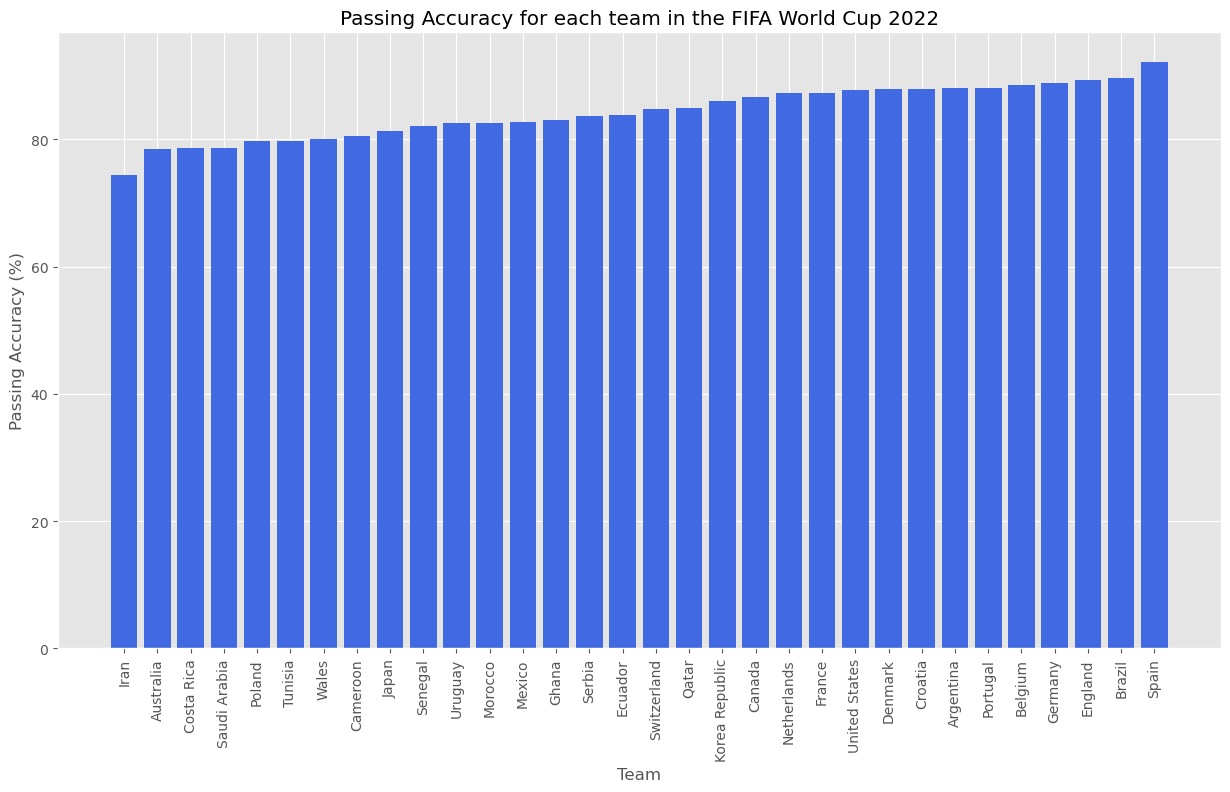

In [84]:
#Part K

accuracy_df = fifa_df.groupby('Team').agg({'Passes': 'sum', 'Passes Completed': 'sum'})

accuracy_df['Passing Accuracy'] = (accuracy_df['Passes Completed'] / accuracy_df['Passes']) * 100

accuracy_df = accuracy_df.reset_index()

sorted_accuracy_df = accuracy_df.sort_values('Passing Accuracy', ascending=True)

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(sorted_accuracy_df['Team'], sorted_accuracy_df['Passing Accuracy'], color='royalblue')

ax.set_xlabel('Team')

ax.set_ylabel('Passing Accuracy (%)')

ax.set_title('Passing Accuracy for each team in the FIFA World Cup 2022')

plt.xticks(rotation=90)

plt.show()

I wanted to see which team had the highest sucessful passes, as we can see from the graph, Spain has the highest passing accuracy out of any other team, at 92.23% and the lowest was Iran at 74.44%, that means Spain only missed 297 passes in the entire tournament. That is impressive.

<h2> Problem 3 <h2> 

In [13]:
#Part A

covid_df = pd.read_csv('owid-covid-data.csv')

print(covid_df)

print(covid_df.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'owid-covid-data.csv'

In [89]:
#Part B 

num_of_unique_dates = len(covid_df['date'].unique())

print(num_of_unique_dates)

1175


In [90]:
#Part C

num_of_unique_countries = len(covid_df['iso_code'].unique())

print(num_of_unique_countries)

255


In [91]:
#Part D

covid_df = covid_df.query('iso_code.str.startswith("OWID_") == False').reset_index(drop=True)

num_of_unique_countries = len(covid_df['iso_code'].unique())

print(num_of_unique_countries)

237


In [92]:
#Part E

df_v = covid_df[covid_df['new_vaccinations'].notnull()]

earliest_date = df_v['date'].min()

In [93]:
#Part F

#Create dataframe copy then make changes for per million

df_v_copy = df_v.copy()

df_v_copy.loc[:, 'total_vaccinations_per_million'] = 10000 * df_v_copy['total_vaccinations_per_hundred']

In [94]:
#Part G

def days_since(date_str):
    
    #make a base timestamp
    
    timestamp = tm.mktime(tm.strptime(date_str, "%Y-%m-%d"))
    
    date = tm.mktime(tm.strptime("2020-12-09", "%Y-%m-%d"))
    
    #the diffrence between input and the timestamp
    
    diffrence = timestamp - date
    
    #convert it into days by 60 * 60 * 24
    
    return int(diffrence / (60 * 60 * 24))
               
df_v_copy["DaysSince9Dec20"] = df_v_copy["date"].apply(days_since)

In [95]:
#Part H

#Filtering data for a new dataset consisting of only 4 coloumns and each row represents one country MUST USE GROUP BY

#Prompted how to write a function that obtains only the first non null value and ignores the rest of the null values

def total_country_data(rows):
    
    #Find the last value of total_vaccinations_per_hundred column
    
    latest_vaccinations = rows['total_vaccinations_per_hundred'].iloc[-1]  
    
    #get the index of first non null value using .first_valid_index()
    
    earliest_deaths_idx = rows['total_deaths_per_million'].first_valid_index()

    #test if the value of the index is None, if it is then set earliest death to Nan
    
    if earliest_deaths_idx is None:
    
        earliest_deaths = np.nan
    
    else:
        
    #if the value of index is not None then earliest_deaths is set to the value of total_deaths_per_million at the same index    
        
        earliest_deaths = rows['total_deaths_per_million'].loc[earliest_deaths_idx]
    
    #get the index of last non null value using .last_valid_index()
    
    latest_deaths_idx = rows['total_deaths_per_million'].last_valid_index()
    
    #test if the value of the index is None, if it is then set latest death to Nan
    
    if latest_deaths_idx is None:
        
        latest_deaths = np.nan
    
    else:
        
    #if the value of index is not None then latest_deaths is set to the value of total_deaths_per_million at the same index    
        
        latest_deaths = rows['total_deaths_per_million'].loc[latest_deaths_idx]
    
    total_death_per_m_since_vac = latest_deaths - earliest_deaths
    
    return pd.DataFrame({'iso code': rows['iso_code'].iloc[0], 'Total latest vaccinations (per Hundred)': latest_vaccinations, 'Total earliest deaths (per Million)': earliest_deaths, 'Total latest deaths (per Million)': latest_deaths, 'TotalDeathPerMSinceVac': total_death_per_m_since_vac}, index=[0])

df_country = df_v_copy.groupby('iso_code').apply(total_country_data).reset_index(drop=True)


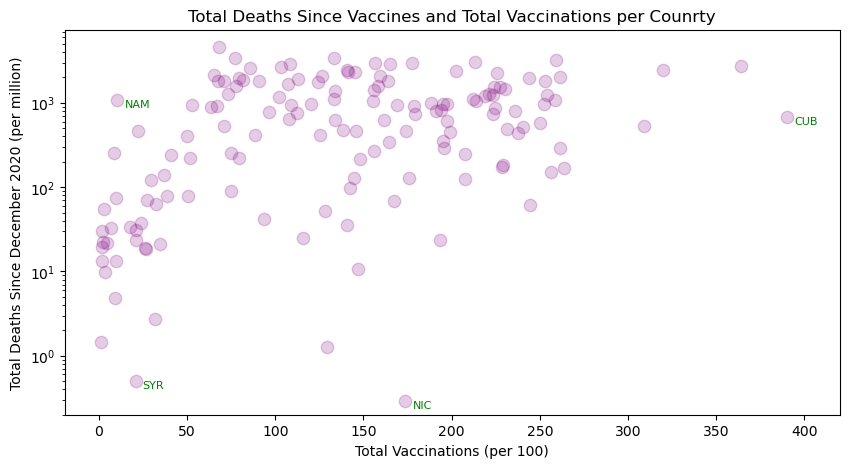

In [96]:
#Part I

plt.style.use('default')

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df_country['Total latest vaccinations (per Hundred)'], df_country['TotalDeathPerMSinceVac'], marker='o', color='purple', alpha=0.2, s=80)

ax.set_xlabel('Total Vaccinations (per 100)')

ax.set_ylabel('Total Deaths Since December 2020 (per million)')

ax.set_title('Total Deaths Since Vaccines and Total Vaccinations per Counrty')

ax.set_xscale('linear')

ax.set_yscale('log')

ax.set_ylim(bottom=0.2)

ax.set_xlim(right=420)

highlighted = df_country[df_country['iso code'].isin(['NAM', 'SYR', 'NIC', 'CUB'])]

for i, row in highlighted.iterrows():
    
    ax.annotate(row['iso code'], (row['Total latest vaccinations (per Hundred)'], row['TotalDeathPerMSinceVac']), textcoords="offset points", xytext=(5,-5), ha='left', color='green', fontsize=8)

plt.show()

In [97]:
#Part J

df_GBR = df_v_copy[df_v_copy['iso_code'] == 'GBR']

In [98]:
#Part K

df_GBR_copy = df_GBR.copy()

moving_avg = []

for i in range(len(df_GBR_copy)):
    
    if i < 2:
        
        avg = np.mean(df_GBR_copy['total_vaccinations_per_hundred'].iloc[0:3])
    
    elif i > len(df_GBR_copy) - 3:
        
        avg = np.mean(df_GBR_copy['total_vaccinations_per_hundred'].iloc[-3:])
    
    else:
        
        avg = np.mean(df_GBR_copy['total_vaccinations_per_hundred'].iloc[i-2:i+3])
    
    moving_avg.append(avg)

df_GBR_copy.loc[:, 'total_vaccinations_per_hundred_smoothed'] = moving_avg

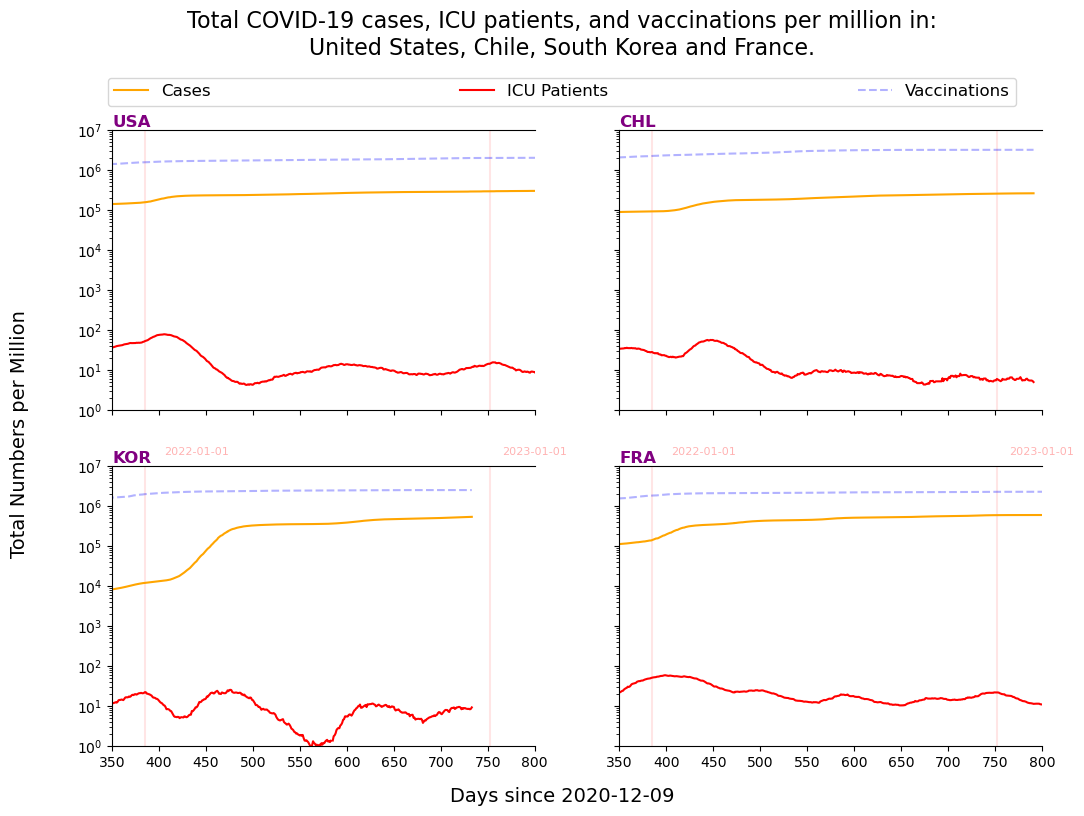

In [99]:
#Part L

#Plot

plt.style.use('default')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Total COVID-19 cases, ICU patients, and vaccinations per million in:\nUnited States, Chile, South Korea and France.', fontsize=16, y=1.03)

fig.text(0.5, 0.04, 'Days since 2020-12-09', ha='center', fontsize=14)

fig.text(0.04, 0.5, 'Total Numbers per Million', va='center', rotation='vertical', fontsize=14)

#Datasets

df_USA = df_v_copy[df_v_copy['iso_code'] == 'USA']

df_CHL = df_v_copy[df_v_copy['iso_code'] == 'CHL']

df_KOR = df_v_copy[df_v_copy['iso_code'] == 'KOR']

df_FRA = df_v_copy[df_v_copy['iso_code'] == 'FRA']

#USA Plot

axs[0, 0].set_yscale('log')

axs[0, 0].set_title('USA', fontweight='bold', color='purple', loc='left', pad=0)

axs[0, 0].set_xticklabels([])

axs[0, 0].axvline(x=385, color='r', alpha=0.1)

axs[0, 0].axvline(x=752, color='r', alpha=0.1)

axs[0, 0].spines['right'].set_visible(False)

axs[0, 0].set_ylim(bottom=1)

axs[0, 0].set_ylim(top=1e7)

axs[0, 0].set_xlim(left=350)

axs[0, 0].set_xlim(right=800)

axs[0, 0].plot(df_USA['DaysSince9Dec20'], df_USA['total_cases_per_million'], color='orange')

axs[0, 0].plot(df_USA['DaysSince9Dec20'], df_USA['total_vaccinations_per_million'], color='blue', linestyle='--', alpha=0.3, label='Vaccinations')

axs[0, 0].plot(df_USA['DaysSince9Dec20'], df_USA['icu_patients_per_million'], color='red')

#Chile Plot

axs[0, 1].set_yscale('log')

axs[0, 1].set_title('CHL', fontweight='bold', color='purple', loc='left', pad=0)

axs[0, 1].set_xticklabels([])

axs[0, 1].set_yticklabels([])

axs[0, 1].axvline(x=385, color='r', alpha=0.1)

axs[0, 1].axvline(x=752, color='r', alpha=0.1)

axs[0, 1].spines['right'].set_visible(False)

axs[0, 1].set_ylim(bottom=1)

axs[0, 1].set_ylim(top=1e7)

axs[0, 1].set_xlim(left=350)

axs[0, 1].set_xlim(right=800)

axs[0, 1].plot(df_CHL['DaysSince9Dec20'], df_CHL['total_cases_per_million'], color='orange')

axs[0, 1].plot(df_CHL['DaysSince9Dec20'], df_CHL['total_vaccinations_per_million'], color='blue', linestyle='--', alpha=0.3)

axs[0, 1].plot(df_CHL['DaysSince9Dec20'], df_CHL['icu_patients_per_million'], color='red')

#South Korea Plot

axs[1, 0].set_yscale('log')

axs[1, 0].set_title('KOR', fontweight='bold', color='purple', loc='left', pad=0)

axs[1, 0].axvline(x=385, color='r', alpha=0.1)

axs[1, 0].axvline(x=752, color='r', alpha=0.1)

axs[1, 0].annotate('2022-01-01', xy=(0.2, 1.05), xycoords='axes fraction', ha='center', va='center', color='red', alpha=0.3, fontsize=8)

axs[1, 0].annotate('2023-01-01', xy=(1.0, 1.05), xycoords='axes fraction', ha='center', va='center', color='red', alpha=0.3, fontsize=8)

axs[1, 0].spines['right'].set_visible(False)

axs[1, 0].set_ylim(bottom=1)

axs[1, 0].set_ylim(top=1e7)

axs[1, 0].set_xlim(left=350)

axs[1, 0].set_xlim(right=800)

axs[1, 0].plot(df_KOR['DaysSince9Dec20'], df_KOR['total_cases_per_million'], color='orange')

axs[1, 0].plot(df_KOR['DaysSince9Dec20'], df_KOR['total_vaccinations_per_million'], color='blue', linestyle='--', alpha=0.3)

axs[1, 0].plot(df_KOR['DaysSince9Dec20'], df_KOR['icu_patients_per_million'], color='red')

#France Plot

axs[1, 1].set_yscale('log')

axs[1, 1].set_title('FRA', fontweight='bold', color='purple', loc='left', pad=0)

axs[1, 1].set_yticklabels([])

axs[1, 1].axvline(x=385, color='r', alpha=0.1)

axs[1, 1].axvline(x=752, color='r', alpha=0.1)

axs[1, 1].annotate('2022-01-01', xy=(0.2, 1.05), xycoords='axes fraction', ha='center', va='center', color='red', alpha=0.3, fontsize=8)

axs[1, 1].annotate('2023-01-01', xy=(1.0, 1.05), xycoords='axes fraction', ha='center', va='center', color='red', alpha=0.3, fontsize=8)

axs[1, 1].spines['right'].set_visible(False)

axs[1, 1].set_ylim(bottom=1)

axs[1, 1].set_ylim(top=1e7)

axs[1, 1].set_xlim(left=350)

axs[1, 1].set_xlim(right=800)

orange_line = axs[1, 1].plot(df_FRA['DaysSince9Dec20'], df_FRA['total_cases_per_million'], color='orange', label='Cases')

blue_dashed_line = axs[1, 1].plot(df_FRA['DaysSince9Dec20'], df_FRA['total_vaccinations_per_million'], color='blue', linestyle='--', alpha=0.3, label='Vaccinations')

red_line = axs[1, 1].plot(df_FRA['DaysSince9Dec20'], df_FRA['icu_patients_per_million'], color='red', label='ICU Patients')

legend = fig.legend(handles=[orange_line[0], red_line[0], blue_dashed_line[0]], labels=['Cases', 'ICU Patients', 'Vaccinations'], loc='upper center', bbox_to_anchor=(0.5, 0.956,), ncol=3, fontsize=12, columnspacing=15.0)

plt.show()

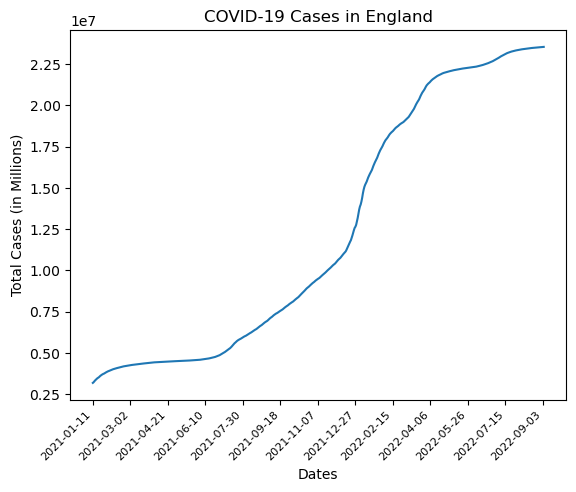

In [100]:
#Part M

df_GBR_copy['date'] = pd.to_datetime(df_GBR_copy['date'])

fig, ax = plt.subplots()

ax.plot(df_GBR_copy['date'], df_GBR_copy['total_cases'])

ax.set_xlabel('Dates')

ax.set_ylabel('Total Cases (in Millions)')

ax.set_title('COVID-19 Cases in England')

ax.set_xticks(df_GBR_copy['date'][::50])

ax.set_xticklabels(df_GBR_copy['date'][::50].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)

plt.show()

The chart shows the growth rate of COVID-19 over time. We can see that during December 2021 the cases started increasing rapidly and by July 2022 it seemed to have peaked and the rate of infection started slowing down.